# Forschungsdaten des Textgrid Repository (tg_rep)

<a id="0"></a>
## Inhalt

1. [Statistische Beschreibung des Datensatzes](#1)

2. [Univariate Plots](#2)

   [Publikation von Forschungsdaten im Zeitverlauf](#2.1)
   
   [Entstehungszeit der Ressourcen](#2.4)

   [Sprachverteilung](#2.3)

   [Verteilung der Publisher](#2.5)

   [Lizenzverteilung]

   [Verteilung des Ressourcentyps]


3. [Word Clouds](#3)
   
   [Häufige Titelbegriffe](#3.1)

   [Urheberschaft]
   
   [Beschreibung der Ressource](#3.2)
   
   [Thema der Ressource](#3.3)
   
   4. [Bi- und multivariate Plots](#4)


<a id="1"></a>
## 1 Statistische Beschreibung des Datensatzes

[Zurück zum Anfang](#0)

In [2]:
# Importieren der Bibliotheken
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:

# Erstellen des 1. DataFrames
data_tg = pd.read_csv(
    r'../../data/refined/clarin/tg/tg-records-20240620_refined.csv',
    dtype=str,  # Set all columns to be strings
    low_memory=False  # Optional, suppresses the DtypeWarning
)

# Erstellen des 2. Dataframes (recordweise gruppiert)
# Kopie des Dataframes erstellen, record identifier durch alle Zeilen füllen

data_tg_grouped = data_tg.copy()
data_tg_grouped['record id'] = data_tg_grouped['record id'].ffill()  # record id auffüllen


# Gruppieren und joinen der Daten nach record identifier
data_tg_grouped = data_tg_grouped.groupby('record id').agg({
    'datestamp': 'first',  
    'source': lambda x: '; '.join(x.dropna().unique()),  
    'identifier': lambda x: '; '.join(x.dropna().unique()),  
    'format': lambda x: '; '.join(x.dropna().unique()),
    'format - mediatype': lambda x: '; '.join(x.dropna().unique()),
    'format - subtype': lambda x: '; '.join(x.dropna().unique()),
    'relation': lambda x: '; '.join(x.dropna().unique()),  
    'title': lambda x: '; '.join(x.dropna().unique()),
    'date': lambda x: '; '.join(x.dropna().unique()),  
    'type': lambda x: '; '.join(x.dropna().unique()),  
    'creator': lambda x: '; '.join(x.dropna().unique()),  
    'rights': lambda x: '; '.join(x.dropna().unique()),
    'language': lambda x: '; '.join(x.dropna().unique()), 
    'type': lambda x: '; '.join(x.dropna().unique()),    
    'description': lambda x: '; '.join(x.dropna().unique()),  
    'publisher': lambda x: '; '.join(x.dropna().unique()),  
    'record id': lambda x: '; '.join(x.dropna().unique())  
}).reset_index(drop=True)

#data_tg_grouped.fillna('NA', inplace=True)  # NaT durch NA ersetzen

# Transformieren von 'datestamp' und 'date' zu datetime objects
data_tg_grouped[['date', 'datestamp']] = data_tg_grouped[['date', 'datestamp']].apply(pd.to_datetime, errors='coerce')
data_tg[['date', 'datestamp']] = data_tg[['date', 'datestamp']].apply(pd.to_datetime, errors='coerce')

data_tg_grouped.replace('', 'NA', inplace=True)  # leere Werte durch NA ersetzen





                column  count   type
10             creator  98444  valid
8                 date  98956  valid
0            datestamp  98957  valid
13         description     13  valid
3               format  98957  valid
4   format - mediatype  98957  valid
5     format - subtype  98957  valid
2           identifier  98957  valid
12            language   1623  valid
14           publisher      1  valid
15           record id  98957  valid
6             relation  98957  valid
11              rights  97824  valid
1               source  94890  valid
7                title  98957  valid
9                 type  98956  valid


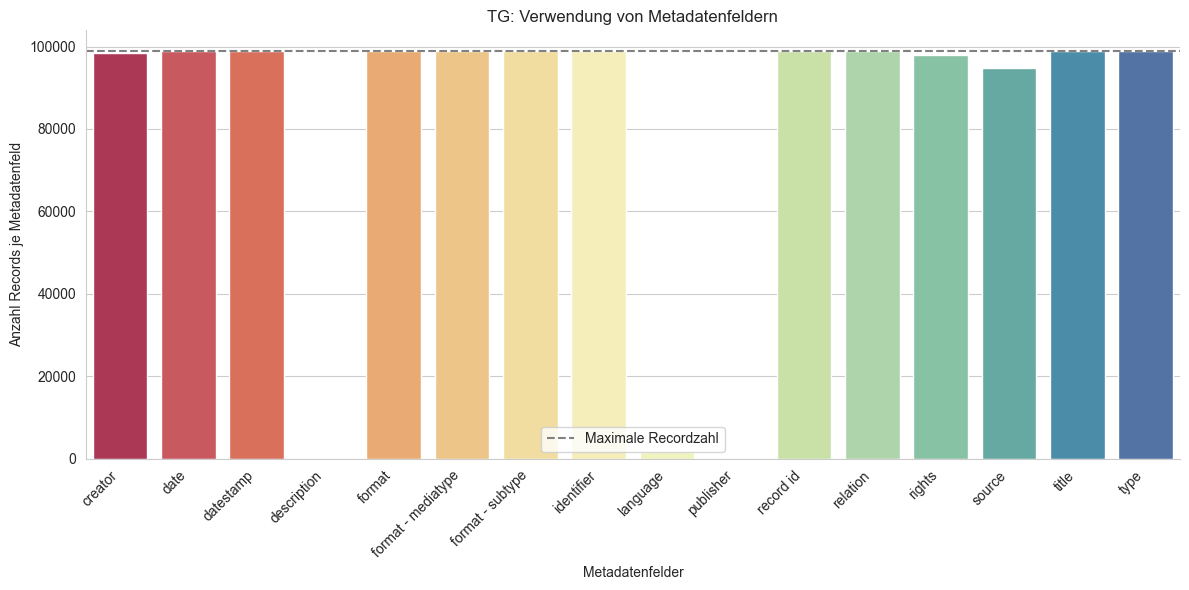

In [32]:
# Erstellen eines DataFrames zur Zusammenfassung der gültigen Einträge für jedes Metadatenfeld
metadata_usage = pd.DataFrame(columns=['column', 'count', 'type'])

# Verwendung des gruppierten Dataframes
for column in data_tg_grouped.columns:
    # Zählen gültiger Werte
    valid_count = data_tg_grouped[column][data_tg_grouped[column] != 'NA'].count()

    # Erstellen eines temporären DataFrames
    valid_row = pd.DataFrame({'column': [column], 'count': [valid_count], 'type': ['valid']})

    # Verkettung der Zeilen
    metadata_usage = pd.concat([metadata_usage, valid_row], ignore_index=True)

metadata_usage = metadata_usage.sort_values(by='column')

# Ausgabe zur Prüfung von metadata_usage
print(metadata_usage)

# Berechnen der maximalen Anzahl der Records mit 'record id'
max_record_count = data_tg_grouped['record id'].nunique()


sns.catplot(data=metadata_usage, x='column', y='count', kind='bar', height=6, aspect=2, hue='column', palette='Spectral')

# Zeichnen einer horizontalen Linie bei der maximalen Datensatzanzahl
plt.axhline(y=max_record_count, color='grey', linestyle='--', label='Maximale Recordzahl')

# Plot-Beschriftungen und Titel anpassen
plt.xticks(rotation=45, ha='right')
plt.xlabel('Metadatenfelder')
plt.ylabel('Anzahl Records je Metadatenfeld')
plt.title('TG: Verwendung von Metadatenfeldern')
plt.legend()
plt.tight_layout()
plt.savefig("TG_Verwendung_von_Metadatenfeldern.png", dpi=600)
plt.show()

In [5]:
'Zeilenweiser Dataframe: Info zu Spalten und Datentypen'
data_tg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385457 entries, 0 to 385456
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype              
---  ------                     --------------   -----              
 0   datestamp                  98957 non-null   datetime64[ns, UTC]
 1   source                     375692 non-null  object             
 2   identifier                 197890 non-null  object             
 3   format                     98957 non-null   object             
 4   format - mediatype         98957 non-null   object             
 5   format - subtype           98957 non-null   object             
 6   relation                   98957 non-null   object             
 7   title                      98957 non-null   object             
 8   date                       98956 non-null   datetime64[ns, UTC]
 9   type                       98956 non-null   object             
 10  creator                    98444 non-null   object      

In [6]:
'Zeilenweiser Dataframe: Erste 5 Zeilen'
data_tg.head(15)

,datestamp,source,identifier,format,format - mediatype,format - subtype,relation,title,date,type,creator,rights,language,description,publisher,record id,record - header - setSpec
0,2017-06-22 07:43:37+00:00,Sammelhandschrift,textgrid:39zjt.0,text/tg.edition+tg.aggregation+xml,text,xml,TGPR-899513f8-51ed-f854-f9c3-587367ac0e26,"Stadtbibliothek und Stadtarchiv Trier, Hs. 220...",2017-06-22 07:43:38+00:00,other,NaN,NaN,NaN,NaN,NaN,textgrid:39zjt.0,project:TGPR-899513f8-51ed-f854-f9c3-587367ac0e26
1,NaT,"Wahrscheinlich kölnisch, später St. Matthias",hdl:11378/0000-000B-6498-9,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,Hs. 2206/847 8°,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-06-27 09:21:49+00:00,St. Matthias,textgrid:3bvhc.0,text/tg.edition+tg.aggregation+xml,text,xml,TGPR-899513f8-51ed-f854-f9c3-587367ac0e26,"Bibliothek der Abtei St. Matthias, Hs. II/10",2017-06-27 09:21:50+00:00,other,NaN,NaN,NaN,NaN,NaN,textgrid:3bvhc.0,project:TGPR-899513f8-51ed-f854-f9c3-587367ac0e26
4,NaT,NaN,hdl:11378/0000-000B-B98B-8,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaT,NaN,Hs. II/10,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2011-12-16 15:16:19+00:00,"Abschatz, Hans Aßmann von",textgrid:jgtr.0,text/tg.edition+tg.aggregation+xml,text,xml,TGPR-372fe6dc-57f2-6cd4-01b5-2c4bbefcfd3c,[Du wüster Ort- an welchen mich verleiten],2011-12-16 15:16:18+00:00,verse,"Abschatz, Hans Aßmann von",CC BY,NaN,NaN,NaN,textgrid:jgtr.0,project:TGPR-372fe6dc-57f2-6cd4-01b5-2c4bbefcfd3c
7,NaT,Hans Aßmann von Abschatz: Poetische Übersetzun...,hdl:11858/00-1734-0000-0001-CFD7-2,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaT,Bern,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaT,281,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
'Zeilenweiser Dataframe: Statistische Kennzahlen'
data_tg.describe()

,datestamp,source,identifier,format,format - mediatype,format - subtype,relation,title,date,type,creator,rights,language,description,publisher,record id,record - header - setSpec
count,98957,375692,197890,98957,98957,98957,98957,98957,98956,98956,98444,97824,1623,13,1,98957,98957
unique,NaN,6544,197849,1,1,1,19,90338,NaN,6,1712,6,14,2,1,98957,19
top,NaN,Berlin,978-3-11-062152-5,text/tg.edition+tg.aggregation+xml,text,xml,TGPR-372fe6dc-57f2-6cd4-01b5-2c4bbefcfd3c,Abschied,NaN,verse,"Logau, Friedrich von",CC BY,spa,"Goethe überliefert der Nachwelt die Ansicht, m...",Hirzel Verlag,textgrid:39zjt.0,project:TGPR-372fe6dc-57f2-6cd4-01b5-2c4bbefcfd3c
freq,NaN,14533,22,98957,98957,98957,93462,45,NaN,59866,3595,94441,320,12,1,1,93462
mean,2012-09-01 02:48:15.694260992+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-08-28 12:10:20.589979392+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2011-12-15 14:27:28+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-15 14:27:35+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2012-01-17 09:48:53+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-17 09:45:06.750000128+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2012-01-31 12:19:04+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-31 12:13:01+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2012-02-06 02:55:40+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-02-06 01:55:44+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2024-06-15 11:01:22+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-15 10:08:04+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
'Recordweiser Dataframe: Info zu Spalten und Datentypen'
data_tg_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98957 entries, 0 to 98956
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   datestamp           98957 non-null  datetime64[ns, UTC]
 1   source              98957 non-null  object             
 2   identifier          98957 non-null  object             
 3   format              98957 non-null  object             
 4   format - mediatype  98957 non-null  object             
 5   format - subtype    98957 non-null  object             
 6   relation            98957 non-null  object             
 7   title               98957 non-null  object             
 8   date                98956 non-null  datetime64[ns, UTC]
 9   type                98957 non-null  object             
 10  creator             98957 non-null  object             
 11  rights              98957 non-null  object             
 12  language            98957 non-nu

In [9]:
'Recordweiser Dataframe: Erste 5 Zeilen'
data_tg_grouped.head()


,datestamp,source,identifier,format,format - mediatype,format - subtype,relation,title,date,type,creator,rights,language,description,publisher,record id
0,2012-04-04 17:35:34+00:00,"Birlinger, Anton; Birlinger, Anton: Sitten und...",textgrid:10000.0; hdl:11858/00-1734-0000-0006-...,text/tg.edition+tg.aggregation+xml,text,xml,TGPR-372fe6dc-57f2-6cd4-01b5-2c4bbefcfd3c,95. [Am Palmsonntag wirft man in Offenau Heu],2012-04-04 17:35:33+00:00,other,"Birlinger, Anton",CC BY,NA,NA,NA,textgrid:10000.0
1,2012-04-04 17:35:37+00:00,"Birlinger, Anton; Anton Birlinger/ M. R. Buck:...",textgrid:10003.0; hdl:11858/00-1734-0000-0006-...,text/tg.edition+tg.aggregation+xml,text,xml,TGPR-372fe6dc-57f2-6cd4-01b5-2c4bbefcfd3c,10. [Der hl. Dreikönigstag ist der »All-loser«...,2012-04-04 17:35:37+00:00,other,"Birlinger, Anton",CC BY,NA,NA,NA,textgrid:10003.0
2,2012-04-04 17:35:39+00:00,"Birlinger, Anton; Anton Birlinger/ M. R. Buck:...",textgrid:10008.0; hdl:11858/00-1734-0000-0006-...,text/tg.edition+tg.aggregation+xml,text,xml,TGPR-372fe6dc-57f2-6cd4-01b5-2c4bbefcfd3c,3. [Mal gruben die Bopfinger einen Brunnen. Ei...,2012-04-04 17:35:38+00:00,other,"Birlinger, Anton",CC BY,NA,NA,NA,textgrid:10008.0
3,2012-04-04 17:35:44+00:00,"Birlinger, Anton; Anton Birlinger/ M. R. Buck:...",textgrid:1000c.0; hdl:11858/00-1734-0000-0006-...,text/tg.edition+tg.aggregation+xml,text,xml,TGPR-372fe6dc-57f2-6cd4-01b5-2c4bbefcfd3c,672. Die Riedlinger sind Sonnenspritzer,2012-04-04 17:35:42+00:00,other,"Birlinger, Anton",CC BY,NA,NA,NA,textgrid:1000c.0
4,2012-04-04 17:35:46+00:00,"Birlinger, Anton; Anton Birlinger/ M. R. Buck:...",textgrid:1000d.0; hdl:11858/00-1734-0000-0006-...,text/tg.edition+tg.aggregation+xml,text,xml,TGPR-372fe6dc-57f2-6cd4-01b5-2c4bbefcfd3c,382. Kegelspiel,2012-04-04 17:35:45+00:00,other,"Birlinger, Anton",CC BY,NA,NA,NA,textgrid:1000d.0


In [10]:
'Recordweiser Dataframe: Statistische Kennzahlen'
data_tg_grouped.describe()

,datestamp,source,identifier,format,format - mediatype,format - subtype,relation,title,date,type,creator,rights,language,description,publisher,record id
count,98957,98957,98957,98957,98957,98957,98957,98957,98956,98957,98957,98957,98957,98957,98957,98957
unique,NaN,55461,98957,1,1,1,19,90338,NaN,7,1713,7,15,3,2,98957
top,NaN,NA,textgrid:10000.0; hdl:11858/00-1734-0000-0006-...,text/tg.edition+tg.aggregation+xml,text,xml,TGPR-372fe6dc-57f2-6cd4-01b5-2c4bbefcfd3c,Abschied,NaN,verse,"Logau, Friedrich von",CC BY,NA,NA,NA,textgrid:10000.0
freq,NaN,4067,1,98957,98957,98957,93462,45,NaN,59866,3595,94441,97334,98944,98956,1
mean,2012-09-01 02:48:15.694261504+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-08-28 12:10:20.589979136+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2011-12-15 14:27:28+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-15 14:27:35+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2012-01-17 09:48:53+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-17 09:45:06.750000128+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2012-01-31 12:19:04+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-31 12:13:01+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2012-02-06 02:55:40+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-02-06 01:55:44+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2024-06-15 11:01:22+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-15 10:08:04+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
'Verwendete Farbpalette'

spectral_palette = sns.color_palette("Spectral", 12, as_cmap=False)
spectral_hex = spectral_palette.as_hex()
print(spectral_palette)
sns.color_palette('Spectral', 12)




[(0.7803152633602461, 0.182160707420223, 0.2968089196462899), (0.8996539792387543, 0.340715109573241, 0.2848904267589389), (0.9679354094579008, 0.5074202229911572, 0.2996539792387543), (0.9923875432525952, 0.6938869665513263, 0.3900807381776239), (0.9954632833525567, 0.8476739715494039, 0.519261822376009), (0.9985390234525182, 0.9547097270280661, 0.6730488273740869), (0.9634755863129566, 0.9853902345251826, 0.6920415224913495), (0.8656670511341794, 0.9460207612456749, 0.6034602076124567), (0.6841983852364477, 0.8722029988465976, 0.6403690888119954), (0.48489042675893923, 0.7940023068050751, 0.6458285274894272), (0.30403690888119955, 0.6537485582468281, 0.6913494809688582), (0.24006151480199922, 0.47635524798154555, 0.7141868512110727)]


[(0.7803152633602461, 0.182160707420223, 0.2968089196462899),
 (0.8996539792387543, 0.340715109573241, 0.2848904267589389),
 (0.9679354094579008, 0.5074202229911572, 0.2996539792387543),
 (0.9923875432525952, 0.6938869665513263, 0.3900807381776239),
 (0.9954632833525567, 0.8476739715494039, 0.519261822376009),
 (0.9985390234525182, 0.9547097270280661, 0.6730488273740869),
 (0.9634755863129566, 0.9853902345251826, 0.6920415224913495),
 (0.8656670511341794, 0.9460207612456749, 0.6034602076124567),
 (0.6841983852364477, 0.8722029988465976, 0.6403690888119954),
 (0.48489042675893923, 0.7940023068050751, 0.6458285274894272),
 (0.30403690888119955, 0.6537485582468281, 0.6913494809688582),
 (0.24006151480199922, 0.47635524798154555, 0.7141868512110727)]

<a id="2"></a>
## 2 Univariate Plots

[Zurück zum Anfang](#0)

- datestamp
- date
- language
- publisher
- rights
- type

<a id="2.1"></a>
### Publikation von Forschungsdaten im Zeitverlauf
[Zurück zum Anfang](#0)

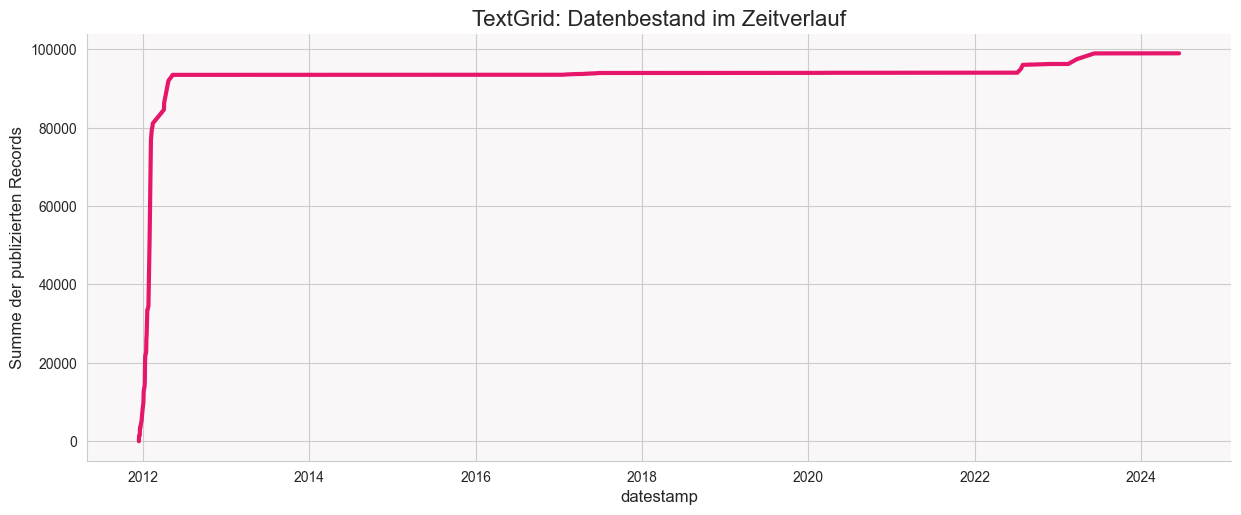

frühster Datestamp: 2011-12-15 ; spätester Datestamp: 2024-06-15


In [33]:
daily_counts = data_tg.groupby(data_tg['datestamp'].dt.date).size().reset_index(name='count')# Gruppieren und Zählen der Records nach Datestamp
daily_counts['cumulative_count'] = daily_counts['count'].cumsum() # Berechnen der kumulativen Summe


sns.set_style('whitegrid', {'axes.facecolor':'#faf7f8', 'figure.facecolor': 'white' }) # Style des Plots anpassen

# Plot der kumulativen Summe der Records über die Zeit
sns.relplot(daily_counts, x='datestamp', y='cumulative_count', kind='line', aspect=2.5, errorbar = None, color='#e6176a', linewidth=3)


plt.title('TextGrid: Datenbestand im Zeitverlauf', fontsize=16)
plt.xlabel('datestamp', fontsize=12)
plt.ylabel('Summe der publizierten Records', fontsize=12)
# plt.xticks(rotation=45) 
plt.savefig("TG_datestamp_line_cum.png", dpi=600, bbox_inches='tight')
plt.show()

print('frühster Datestamp:', data_tg['datestamp'].min().date(), '; spätester Datestamp:', data_tg['datestamp'].max().date())


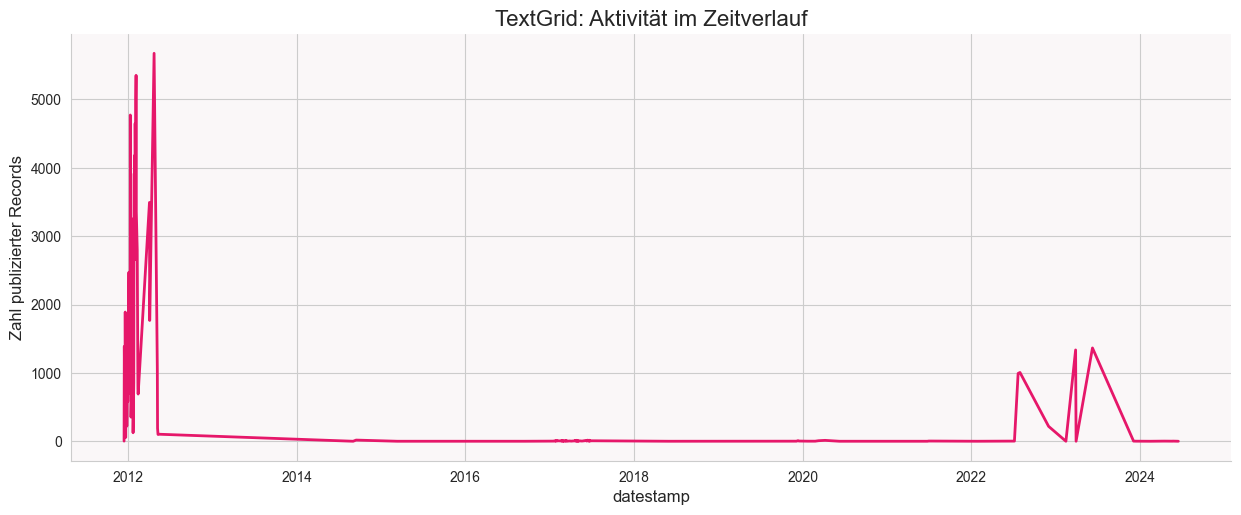

frühster Datestamp: 2011-12-15 ; spätester Datestamp: 2024-06-15


In [34]:
daily_counts = data_tg.groupby(data_tg['datestamp'].dt.date).size().reset_index(name='count') # Gruppieren und Zählen der Records nach Datum
daily_counts['cumulative_count'] = daily_counts['count'].cumsum() # Berechnen der kumulativen Summe

sns.set_style('whitegrid', {'axes.facecolor':'#faf7f8', 'figure.facecolor': 'white' }) # Style des Plots anpassen

sns.relplot(daily_counts, x='datestamp', y='count', kind='line', color='#e6176a', aspect=2.5, linewidth=2) 

plt.title('TextGrid: Aktivität im Zeitverlauf', fontsize=16)
plt.xlabel('datestamp', fontsize=12)
plt.ylabel('Zahl publizierter Records', fontsize=12)
plt.savefig("TG_datestamp_line.png", dpi=600, bbox_inches='tight')
plt.show()
print('frühster Datestamp:', data_tg['datestamp'].min().date(), '; spätester Datestamp:', data_tg['datestamp'].max().date())

### Entstehungszeit der Ressourcen

[Zurück zum Anfang](#0)

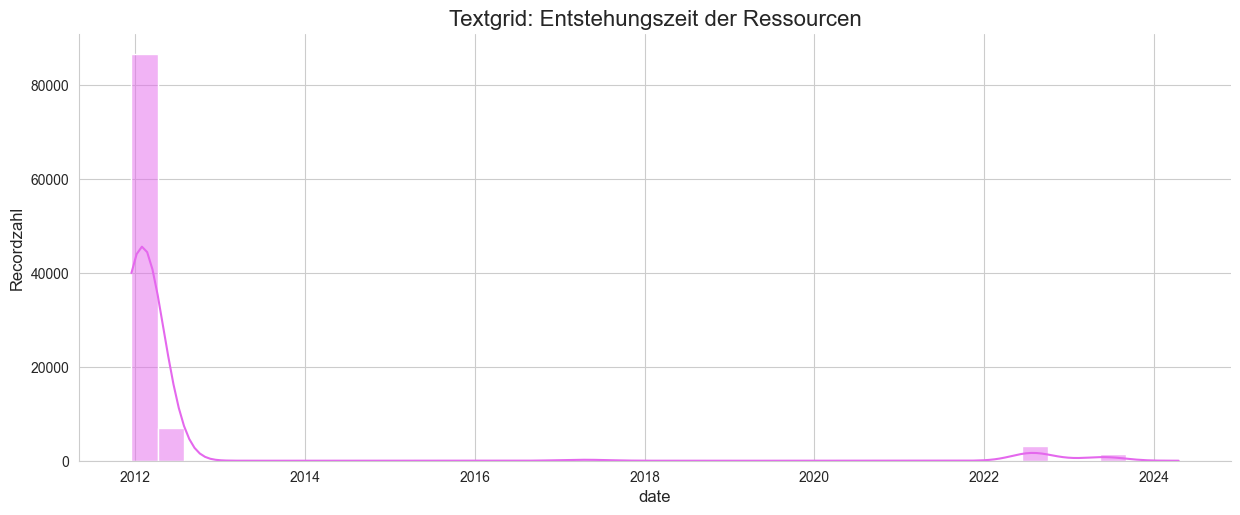

frühstes Datum: 2011-12-15 ; spätestes Datum: 2024-04-15


In [35]:

sns.set_style('whitegrid')
sns.displot(data_tg_grouped, x='date', bins=40, kde=True, color = '#e468ed', aspect=2.5) # Erscheinungszeitpunkt der Forschungsdaten anhand von 'date' in absolten Zahlen

#plt.xticks(rotation=45)
plt.title('Textgrid: Entstehungszeit der Ressourcen', fontsize=16)
plt.xlabel('date', fontsize=12)
plt.ylabel('Recordzahl', fontsize=12)
plt.savefig("TG_date_hist.png", dpi=600, bbox_inches='tight')
plt.show()
print('frühstes Datum:', data_tg['date'].min().date(), '; spätestes Datum:', data_tg['date'].max().date())


<a id="2.3"></a>
### Sprachverteilung

[Zurück zum Anfang](#0)

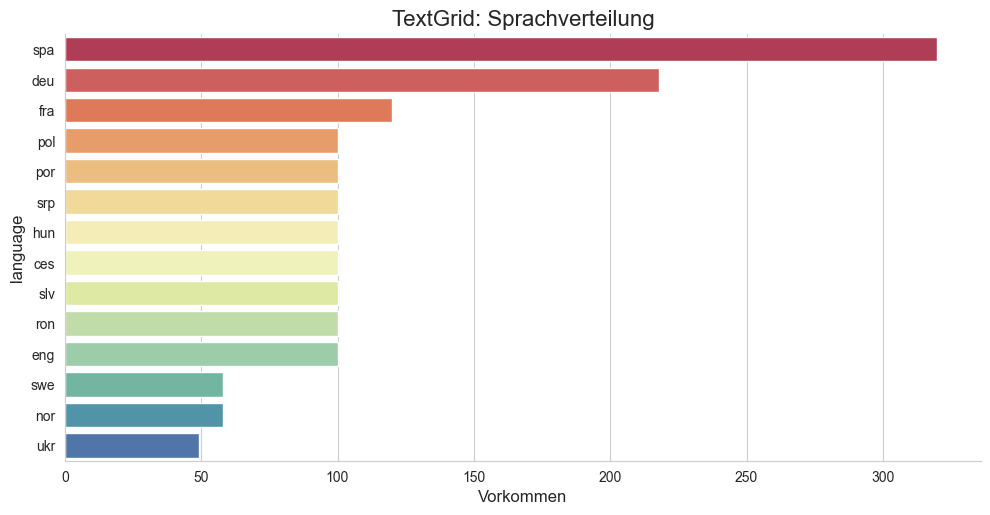

In [46]:
'Catplot: Verteilung der Sprachen'

# Reihenfolge der Werte festlegen
order = data_tg['language'].value_counts().index 
# Konvertieren der Daten in kategorische Variablen
data_tg['language'] = pd.Categorical(data_tg['language'], categories=order, ordered=True)

sns.catplot(data_tg, y = 'language', kind = 'count', aspect = 2, hue = 'language', palette = 'Spectral', legend=False)

plt.title('TextGrid: Sprachverteilung', fontsize=16)
plt.ylabel('language', fontsize=12)#
plt.xlabel('Vorkommen', fontsize=12)
plt.savefig("TG_language_cat.png", dpi=600, bbox_inches='tight')    
plt.show()

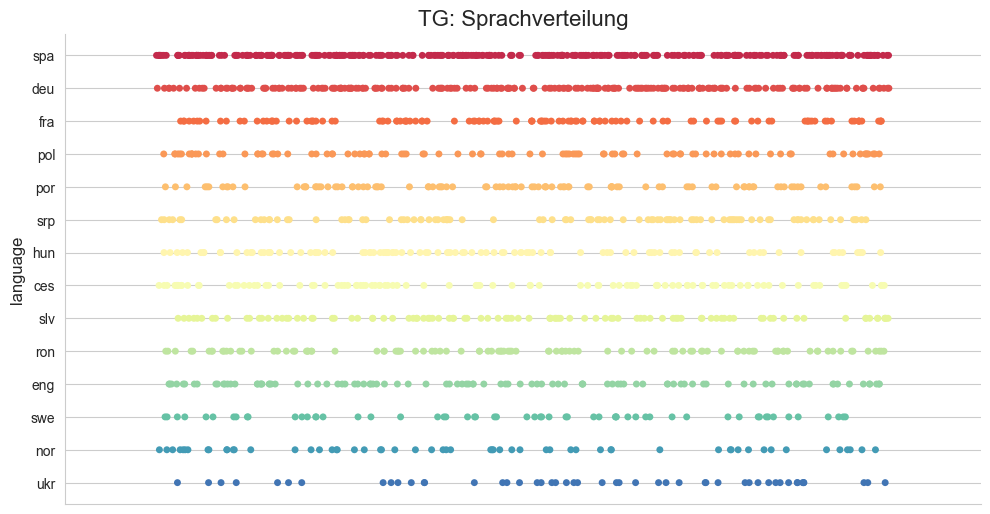

In [16]:
'Scatterplot: Verteilung der Sprachen'

# Reihenfolge der Werte festlegen
order = data_tg['language'].value_counts().index
# Konvertieren der Daten in kategorische Variablen
data_tg['language'] = pd.Categorical(data_tg['language'], categories=order, ordered=True)

sns.catplot(data_tg, y = 'language', aspect = 2, hue = 'language', palette="Spectral", jitter=0.4, legend=False) # Sprachverteilung mit erhöhtem Jitter

plt.title('TG: Sprachverteilung', fontsize=16)
plt.ylabel('language', fontsize=12)
plt.show()

<a id="2.6"></a>
### Verteilung der Lizenzangaben

[Zurück zum Anfang](#0)

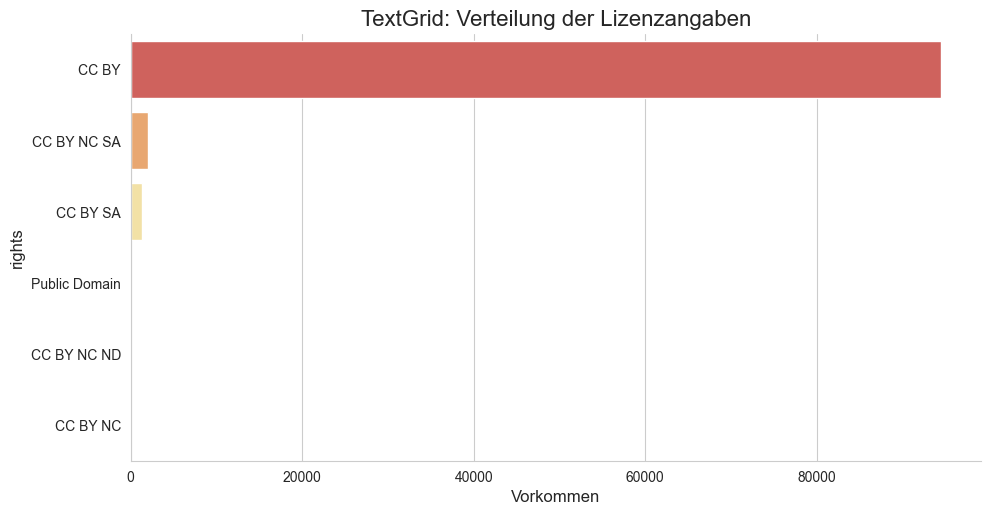

In [47]:
'Catplot: Verteilung der Lizenzangaben'

order = data_tg['rights'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_tg['rights'] = pd.Categorical(data_tg['rights'], categories=order, ordered=True)


sns.catplot(data_tg, y = 'rights', kind='count', aspect = 2, hue = 'rights', palette="Spectral", legend=False)

plt.title('TextGrid: Verteilung der Lizenzangaben', fontsize=16)
plt.xlabel('Vorkommen', fontsize=12)
plt.ylabel('rights', fontsize=12)
plt.savefig("TG_rights_cat.png", dpi=600, bbox_inches='tight')
plt.show()

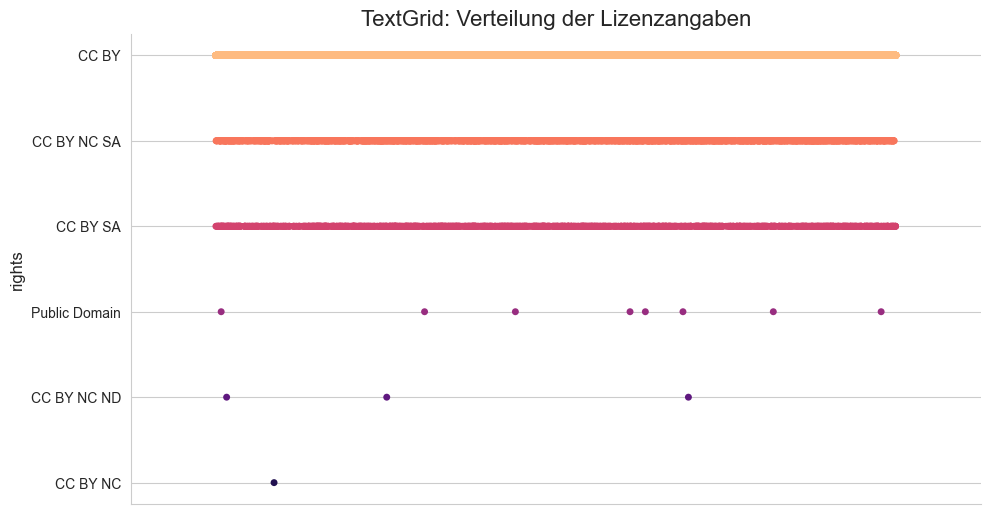

In [49]:
'Scatterplot: Verteilung der Lizenzangaben'

order = data_tg['rights'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_tg['rights'] = pd.Categorical(data_tg['rights'], categories=order, ordered=True)


sns.catplot(data_tg, y = 'rights', aspect = 2, hue = 'rights', palette = 'magma_r', jitter=0.4,legend=False)

plt.title('TextGrid: Verteilung der Lizenzangaben', fontsize=16)
plt.ylabel('rights', fontsize=12)
plt.savefig("TG_rights_scatter.png", dpi=600, bbox_inches='tight')
plt.show()

<a id="2.7"></a>
### Verteilung des Ressourcentyps

[Zurück zum Anfang](#0)

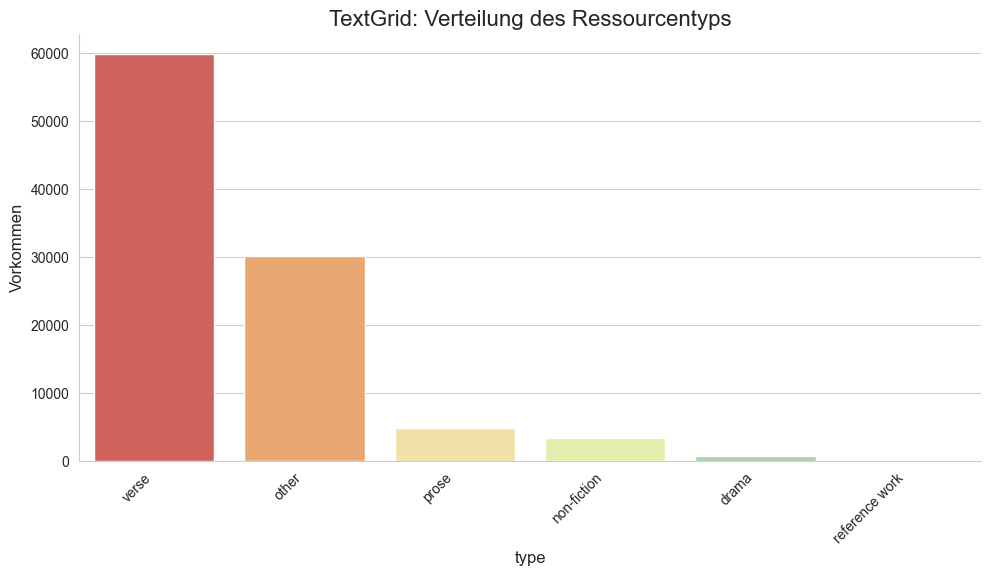

In [43]:
'Verteilung des Ressourcentyps wie von TextGrid angegeben'

# Reihenfolge der Werte festlegen
order_type = data_tg['type'].value_counts().index
# Konvertieren der Daten in kategorische Variablen
data_tg['type'] = pd.Categorical(data_tg['type'], categories=order_type, ordered=True)

sns.catplot(data_tg, x = 'type', kind = 'count', aspect = 2, hue = 'type', palette='Spectral', legend=False)

plt.title('TextGrid: Verteilung des Ressourcentyps', fontsize=16)
plt.xlabel('type', fontsize=12)
plt.ylabel('Vorkommen', fontsize=12)
plt.savefig("TG_type_catplot.png", dpi=600, bbox_inches='tight')
plt.xticks(rotation=45, ha='right')
plt.show()

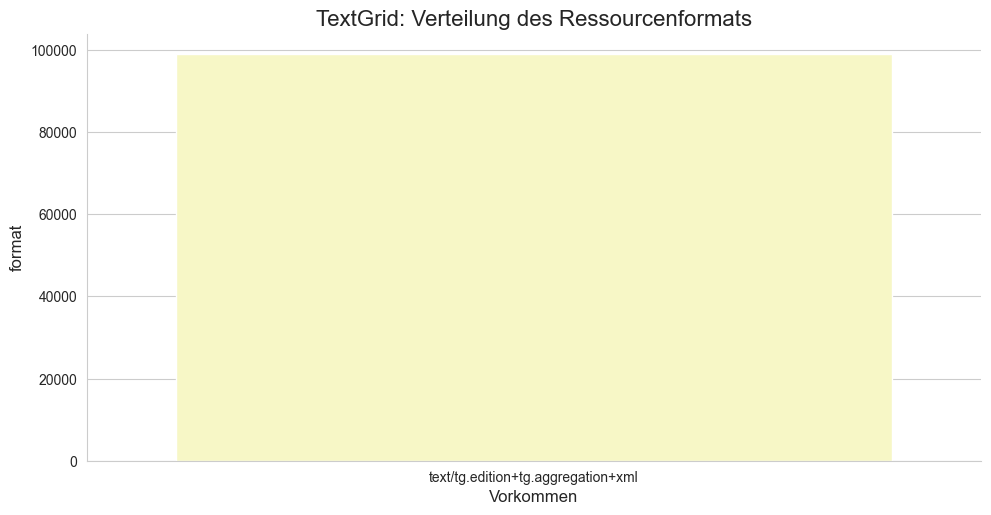

In [45]:
'Verteilung des Formats wie von TextGrid angegeben'

order = data_tg['format'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_tg['format'] = pd.Categorical(data_tg['format'], categories=order, ordered=True)

sns.catplot(data_tg, x = 'format', kind = 'count', aspect = 2, hue = 'format', palette='Spectral', legend=False)

plt.title('TextGrid: Verteilung des Ressourcenformats', fontsize=16)
plt.xlabel('Vorkommen', fontsize=12)
plt.ylabel('format', fontsize=12)
plt.savefig("TG_format_cat.png", dpi=600, bbox_inches='tight')
plt.xticks()
plt.show()

<a id="3"></a>
## Word Clouds

[Zurück zum Anfang](#0)


***Untersuchte Variablen***
- title 
- creator
- description
- source

<a id="3.1"></a>
### Titelbegriffe

[Zurück zum Anfang](#0)

{'e': 1.0, 'nicht': 0.9970972423802612, 'Wenn': 0.7597968069666183, 'so': 0.6865021770682148, 'Gott': 0.6683599419448476, 'ich': 0.6560232220609579, 'Auff': 0.613933236574746, 'Liebe': 0.602322206095791, 'vom': 0.5914368650217707, 'sich': 0.5805515239477503, 'al': 0.5747460087082729, 'du': 0.511611030478955, 'sie': 0.4811320754716981, 'man': 0.4782293178519594, 'Biographie': 0.4462989840348331, 'über': 0.4390420899854862, 'hat': 0.4296081277213353, 'Lied': 0.4274310595065312, 'Nacht': 0.4172714078374456, 'wird': 0.4107402031930334, 'für': 0.3904208998548621, 'mir': 0.3889695210449927, 'alle': 0.3838896952104499, 'ihr': 0.37735849056603776, 'sein': 0.37735849056603776, 'Leben': 0.36792452830188677, 'mein': 0.35123367198838895, 'Frau': 0.35123367198838895, 'eines': 0.3497822931785196, 'er': 0.34615384615384615, 'Mann': 0.3447024673439768, 'Tod': 0.33236574746008707, 'zum': 0.3229317851959361, 'um': 0.3113207547169811, 'noch': 0.3062409288824383, 'Herrn': 0.3047895500725689, 'Welt': 0.304

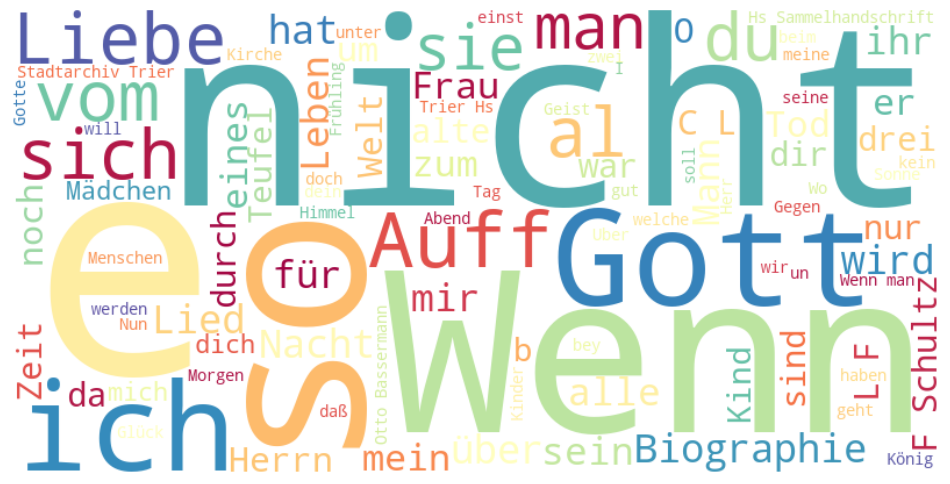

In [21]:

text_data = data_tg["title"].str.cat(sep=' ') # Werte werden als string zusammengefügt
stopwords = set(['der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 'des',
'ein', 'eine', 'einer', 'einen', 'einem', 'oder', 'und', 'auch', 'auf', 'von', 'zu', 'zur', 'in', 'im', 'bei', 'ohne', 'ist', 'mit', 'am', 'aus', 
'vor', 'nach', 'and', 'about', 'the', 'of', 'an', 'a', 'for', 'from', 'to', 'de']) # Stopwortliste
 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Spectral', max_words=100, stopwords = stopwords).generate(text_data) # Erstellung der Wordcloud mit collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() # Anzeige der Wordcloud


<a id="3.2"></a>
### Urheber*innen

[Zurück zum Anfang](#0)

{'Friedrich': 1.0, 'Johann': 0.81149893528377, 'Ludwig': 0.7021572076659569, 'Karl': 0.5807795574483844, 'Wilhelm': 0.533654291269327, 'Georg': 0.533654291269327, 'Christian': 0.44866216091102673, 'Theodor': 0.38079807425238404, 'Franz': 0.3387649291732247, 'Logau': 0.3328395518933432, 'Bartsch': 0.32330339783353396, 'Heinrich': 0.3205258772335895, 'Grässe': 0.30682344227386354, 'Adalbert': 0.23673733913526526, 'Kuhn': 0.2337746504953245, 'Busch': 0.21840570317563188, 'Strackerjan': 0.19424127395611518, 'August': 0.1837792796963244, 'Angelus': 0.17489121377650219, 'Silesius': 0.17489121377650219, 'Anton': 0.16581797981668364, 'Birlinger': 0.16368854735672622, 'Tucholsky': 0.16341079529673178, 'Kurt': 0.16341079529673178, 'Schönwerth': 0.16183686695676328, 'Gottfried': 0.15831867419683363, 'Grillparzer': 0.1511897046569762, 'Wolfgang': 0.14841218405703174, 'Goethe': 0.1483196000370336, 'Paul': 0.1327654846773447, 'Alexander': 0.13008054809739839, 'Schöppner': 0.12674752337746506, 'Terst

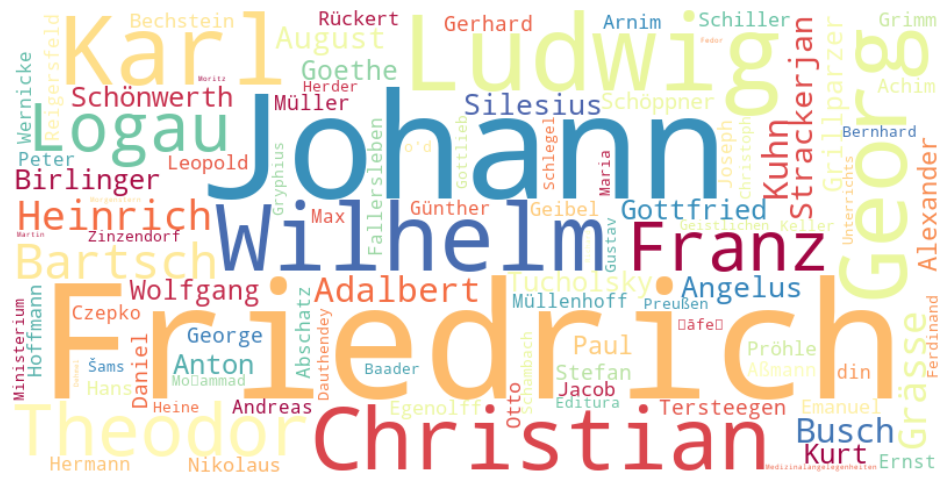

In [22]:

'Word Cloud aufgrund der Vielfalt der Personennamen schwer auszuwerten'

text_data = data_tg["creator"].str.cat(sep=' ') # Werte werden als string zusammengefügt
#stopwords = set(['der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 'ein', 'eine', 'einer', 'einen', 'einem', 'oder', 'und', 'auch', 'auf', 'von', 'zu', 'zur', 'in', 'aus', 'vor', 'nach', 'and', 'about', 'the', 'of', 'an', 'a', 'for', 'from']) # Stopwortliste
 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Spectral', max_words=100, stopwords = stopwords, collocations=False).generate(text_data) # Erstellung der Wordcloud ohne collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() # Anzeige der Wordcloud


<a id="3.4"></a>
### Quellen

[Zurück zum Anfang](#0)

{'Sämtliche Werke': 1.0, 'Werke Herausgegeben': 0.7969344372342806, 'Johann Georg': 0.7804878048780488, 'Sagen Märchen': 0.7667263369881405, 'Georg Theodor': 0.7415529201163571, 'Gesammelte Werke': 0.6475721637950325, 'München Hanser': 0.5959946296710673, 'Karl Karl': 0.5867084358916984, 'Bänden Band': 0.5657865294249272, 'Ludwig Ludwig': 0.5537032893264713, 'Hanser München': 0.5377041843812933, 'Bänden Herausgegeben': 0.5280823450436339, 'Gebräuche': 0.5154396956813605, 'Busch Wilhelm': 0.4567017229805326, 'Wilhelm Busch': 0.4567017229805326, 'Angelus Silesius': 0.4226896397404341, 'München Winkler': 0.42201834862385323, 'poetische Werke': 0.4192213023047662, 'Band Leipzig': 0.4109420452002685, 'literarischen Vereins': 0.4051241888565675, 'Stuttgart Band': 0.4029984336540613, 'Logau Friedrich': 0.4022152606847169, 'Logau Sämmtliche': 0.4022152606847169, 'Sämmtliche Sinngedichte': 0.4022152606847169, 'Sinngedichte Herausgegeben': 0.4022152606847169, 'Gustav Eitner': 0.4022152606847169,

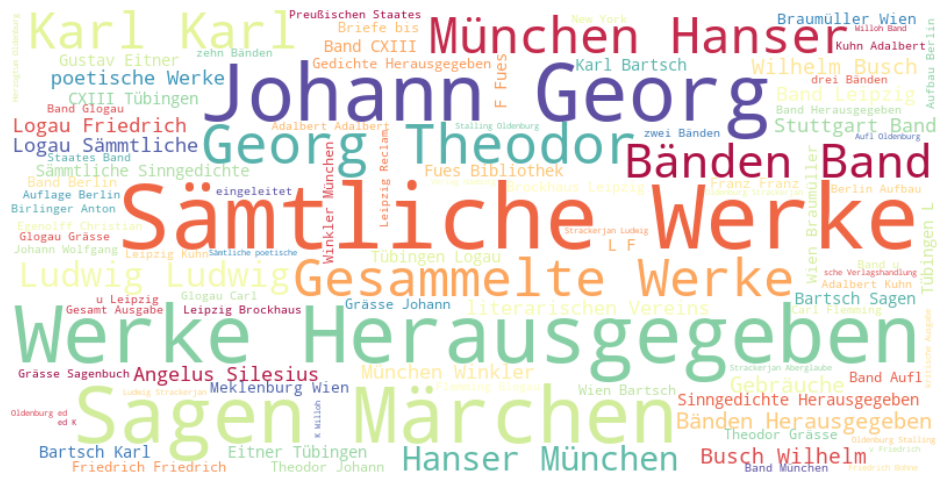

In [36]:
text_data = data_tg["source"].str.cat(sep=' ') # Werte werden als string zusammengefügt
 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Spectral', max_words=100, stopwords = stopwords, collocations=True).generate(text_data) # Erstellung der Wordcloud ohne collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() # Anzeige der Wordcloud


<a id="3.6"></a>
### Beschreibung der Ressource

[Zurück zum Anfang](#0)

{'Farbenlehre': 1.0, 'Nachwelt': 0.25, 'Vertiefung': 0.25, 'Verbreitung': 0.25, 'Aspekten': 0.25, 'Bereich': 0.25, 'widmen': 0.25, 'Projekt': 0.25, 'Bild': 0.25, 'Vielfalt': 0.25, 'Wirkungsgeschichte': 0.25, 'Rezeption': 0.25, 'Inhalten': 0.25, 'Beitrag': 0.25, 'Geschichte': 0.25, 'Zeit': 0.25, 'Goethe überliefert': 0.25, 'Ansicht man': 0.25, 'man habe': 0.25, 'habe sein': 0.25, 'sein Werk': 0.25, 'allem angefeindet': 0.25, 'angefeindet nur': 0.25, 'nur ausnahmsweise': 0.25, 'ausnahmsweise günstig': 0.25, 'günstig aufgenommen': 0.25, 'es sei': 0.25, 'sei bald': 0.25, 'öffentlichen Wahrnehmung': 0.25, 'Wahrnehmung verschwunden': 0.25, 'verschwunden Soweit': 0.25, 'Allgemeinen zutreffen': 0.25, 'zutreffen mag': 0.25, 'mag Berlin': 0.25, 'Berlin bildet': 0.25, 'Ausnahme Hier': 0.25, 'Hier förderte': 0.25, 'förderte Altenstein': 0.25, 'ihm unterstellten': 0.25, 'unterstellten Kultusministerium': 0.25, 'Kultusministerium Maßnahmen': 0.25, 'Farbenlehre indem': 0.25, 'indem er': 0.25, 'er Wis

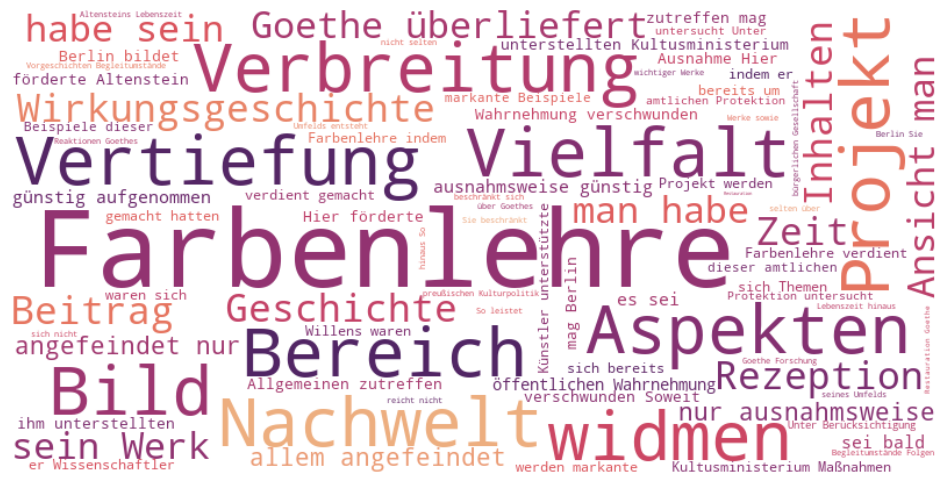

In [24]:
text_data = data_tg["description"].str.cat(sep=' ') # Werte werden als string zusammengefügt
#stopwords = set(['der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 'ein', 'eine', 'einer', 'einen', 'einem', 'oder', 'und', 'auch', 'auf', 'von', 'zu', 'zur', 'in', 'aus', 'vor', 'nach', 'and', 'about', 'the', 'of', 'an', 'a', 'for', 'from']) # Stopwortliste
 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='flare', max_words=100, stopwords = stopwords, collocations=True).generate(text_data) # Erstellung der Wordcloud ohne collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() # Anzeige der Wordcloud


## Bi- und multivariate Plots

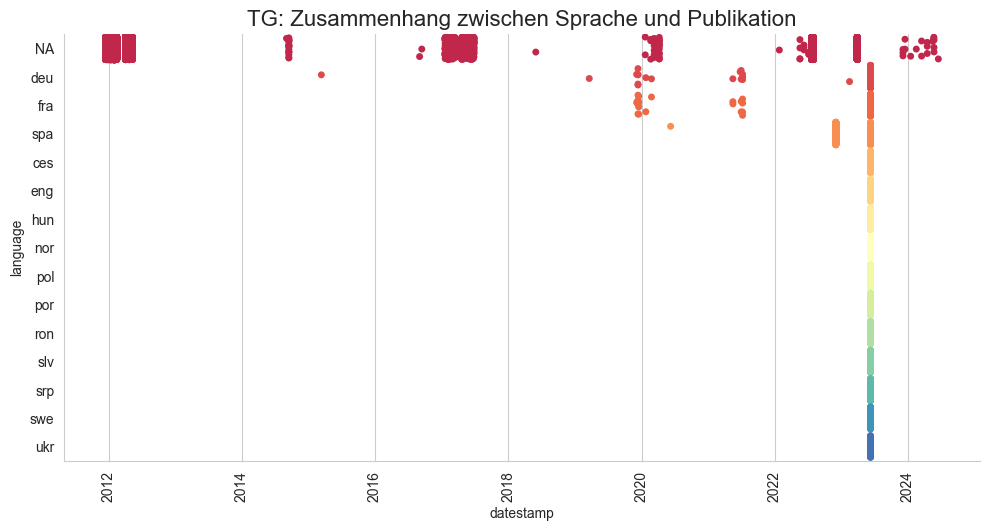

In [25]:
'Zusammenhang zwischen Sprache und datestamp'

sns.catplot(data_tg_grouped, x="datestamp", y="language", hue='language', aspect=2, palette='Spectral', jitter=0.4, legend=False) # falsch, da reihenweise, nicht recordweise ausgewertet wird

plt.title('TG: Zusammenhang zwischen Sprache und Publikation', fontsize=16)
plt.xticks(rotation=90)
plt.show()

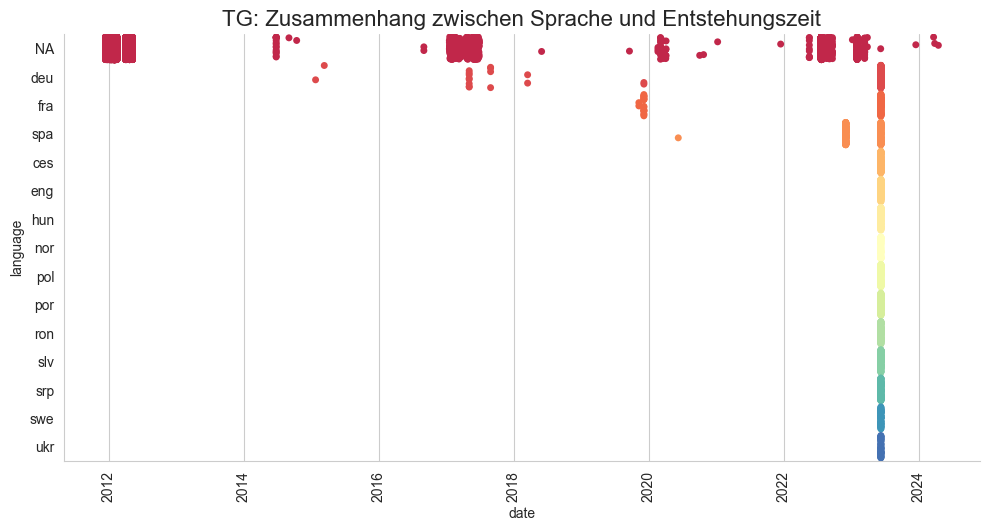

In [26]:
'Zusammenhang zwischen Sprache und date'

sns.catplot(data_tg_grouped, x="date", y="language", hue='language', aspect=2, palette='Spectral', jitter = 0.4, legend=False) 

plt.title('TG: Zusammenhang zwischen Sprache und Entstehungszeit', fontsize=16)
plt.xticks(rotation=90)
plt.show()

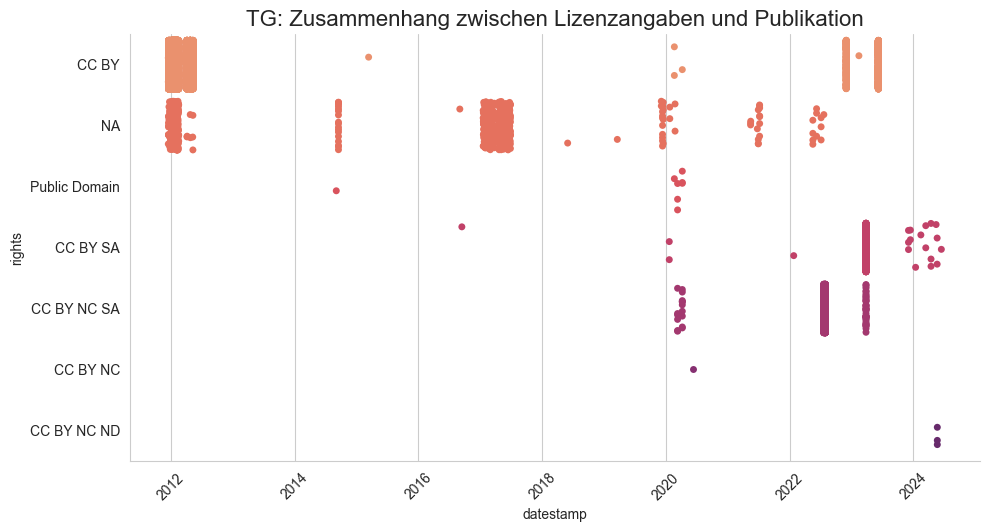

In [27]:
'Zusammenhang zwischen rights und datestamp'
sns.catplot(data_tg_grouped, x="datestamp", y="rights", hue="rights", aspect=2, palette='flare', jitter=0.4, legend=False) # Verteilung der Rechteangaben über die Zeit
plt.xticks(rotation=45)
plt.title('TG: Zusammenhang zwischen Lizenzangaben und Publikation', fontsize=16)
plt.show() 

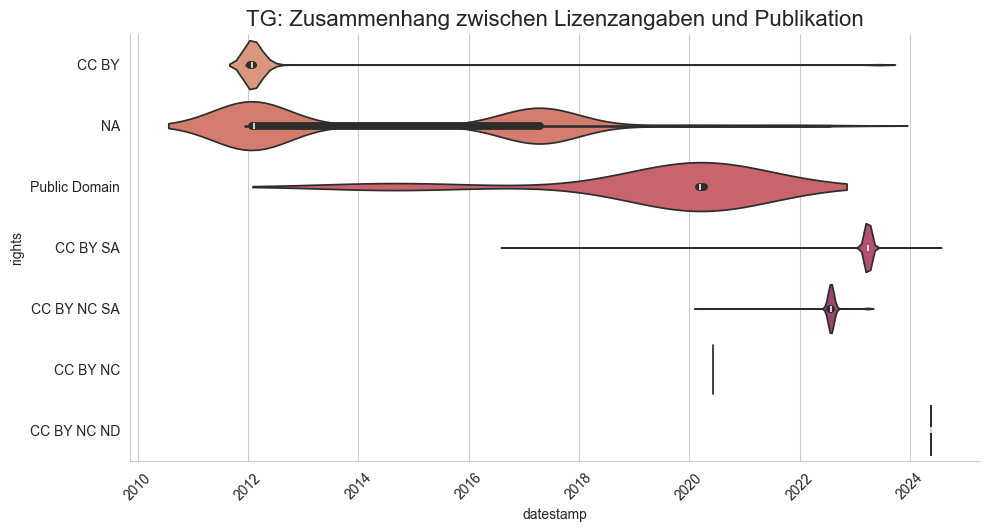

In [28]:
'Zusammenhang zwischen rights und datestamp'
sns.catplot(data_tg_grouped, kind='violin', x="datestamp", y="rights", hue="rights", aspect=2, palette='flare', legend=False) # Verteilung der Rechteangaben über die Zeit
plt.xticks(rotation=45)
plt.title('TG: Zusammenhang zwischen Lizenzangaben und Publikation', fontsize=16)
plt.show() 


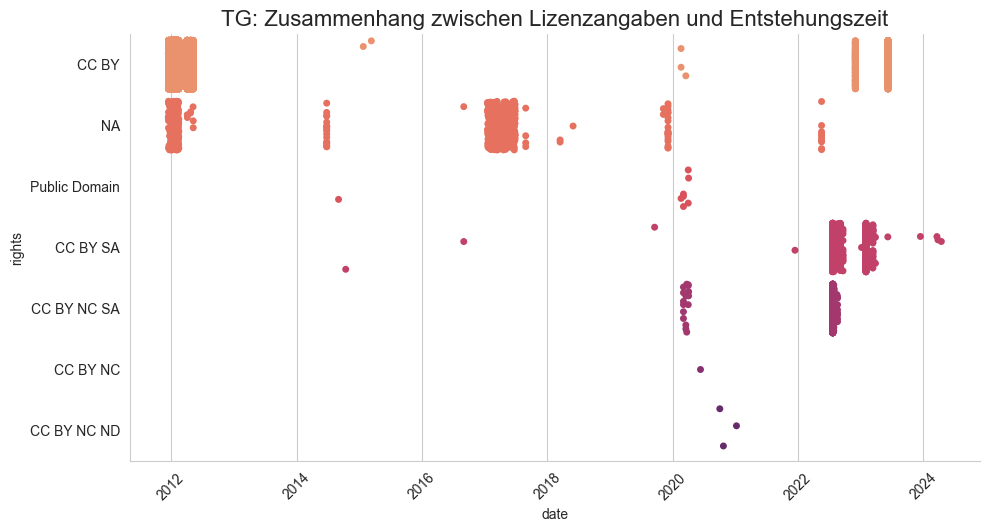

In [29]:
'Zusammenhang zwischen Lizenzangaben und Entstehungszeit der Ressource'
sns.catplot(data_tg_grouped, x="date", y="rights", hue="rights", aspect=2, palette='flare', jitter=0.4, legend=False) # Verteilung der Rechteangaben über die Zeit
plt.xticks(rotation=45)
plt.title('TG: Zusammenhang zwischen Lizenzangaben und Entstehungszeit', fontsize=16)
plt.show() 


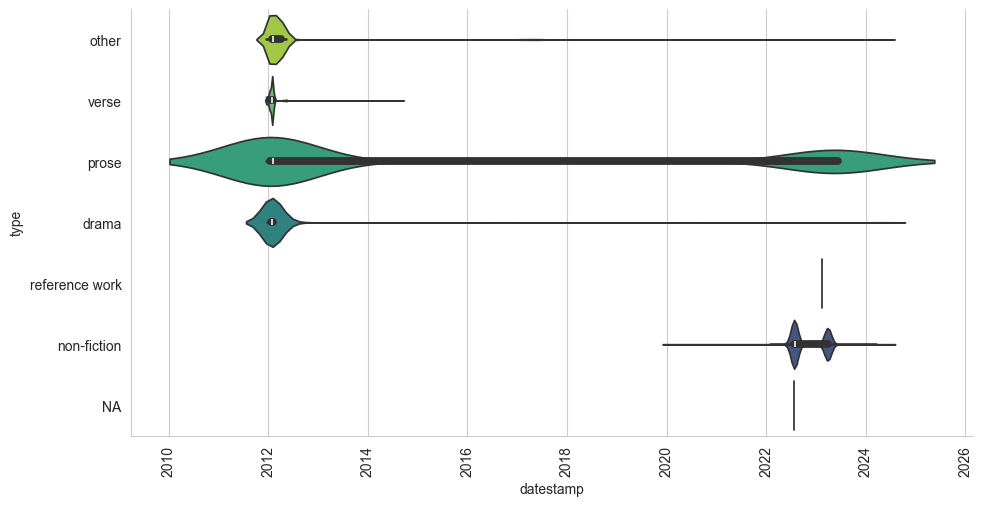

In [30]:
sns.catplot(data_tg_grouped, kind='violin', x="datestamp", y="type", hue='type', aspect=2, palette='viridis_r', legend=False) 
plt.xticks(rotation=90)
plt.show()

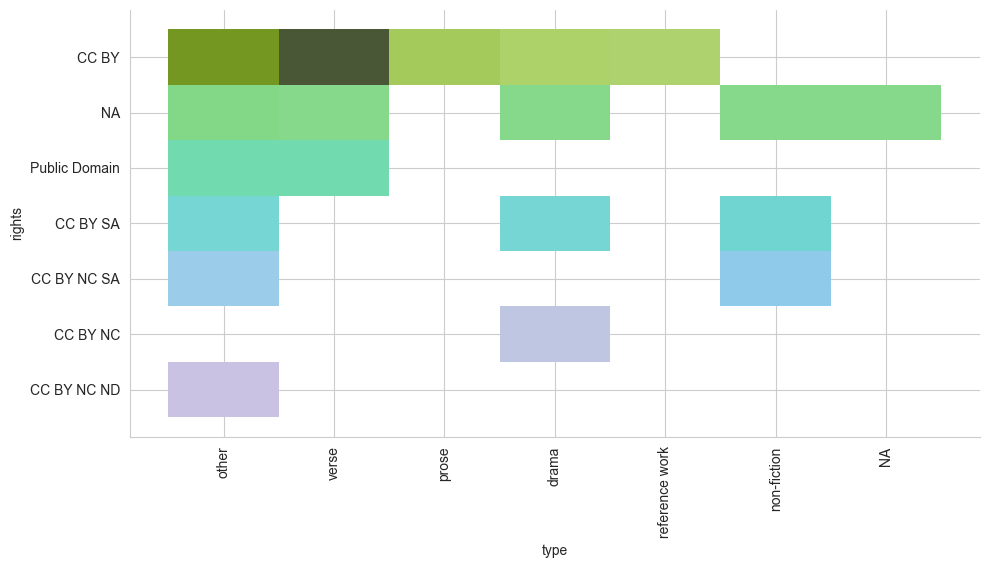

In [31]:
sns.displot(data_tg_grouped, x="type", y="rights", hue='rights', aspect=2, palette='viridis_r', legend=False) 
plt.xticks(rotation=90)
plt.show()